In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%config InlineBackend.figure_format = 'svg'

# UL
- finds patterns in data
- e.g. clustering customers by purchases
- Compressing data using purchase patterns (dimension reduction)
# K-Means Clustering
- Cluster into number of clusters specificed, mean saved
- New samples can be assigend from which
- k-means recalls mean of each cluster ('CENTROIDS')
- FINDS NEAREST CENTROID TO EACH NEW SAMPLE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
points = pd.read_csv('Data_Folder/points.csv', header=None)

points = np.array(points)

array([ 0.06544649, -0.76866376])

(300, 2)

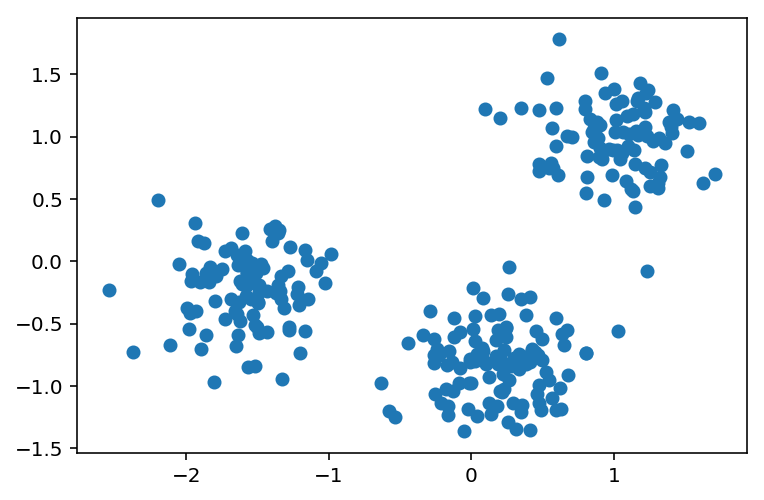

In [104]:
points.shape

xs = points[:,0]
ys = points[:,1]
_ = plt.scatter(xs, ys)
plt.show()


In [106]:
new_points = pd.read_csv('Data_Folder/new_points.csv', header=None)

new_points = np.array(new_points)

In [5]:
new_points.shape

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(new_points)
print(labels[:10])

NameError: name 'new_points' is not defined

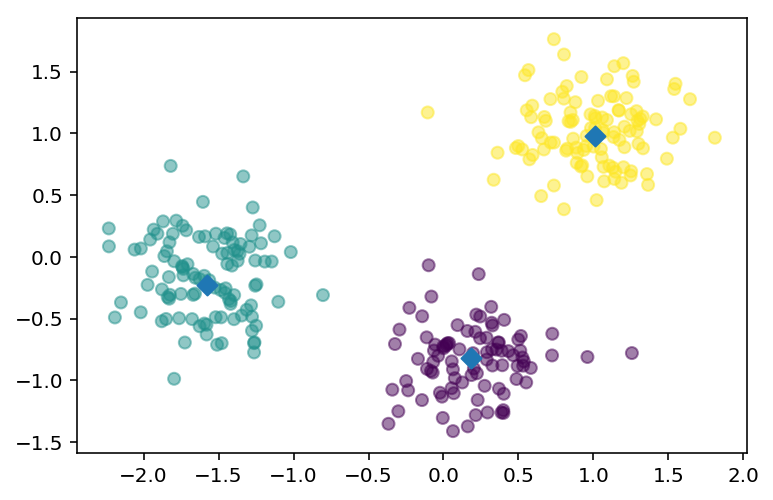

In [158]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
_ = plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
_ = plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

# Looks great, but how sure of 3 clusters is correct?
- oen way is to compare or 'CROSS-TABULATION' with iris samples, BUT WHAT IF THERE WAS NOT ANY
```
df = pd.DataFrame( {'labels':labels, 'species':species} )
ct = pd.crosstab(df['labels'], df['species'])
```
- cluster vs species label using pandas
# If no correct label to check - Inertia
- measure spread of clusters (lower better)
- distance from each sample to CENTROID 
- After .fit() available as ATTRIBUTE 'inertia_'
- in fact, K-means built-in minimising inertia when choosing clusters
# Trade-off between tight clusters and too many
- choose 'elbow' in inertia plot

In [6]:
df_grain = pd.read_csv('Data_Folder/Grains/seeds.csv', header=None)
df_grain_sans = df_grain.drop(columns=7)
df_grain_sans[:1]

ks = range(1,6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_grain_sans)
    inertias.append(model.inertia_)
    
_ = plt.plot(ks, inertias, '-o')
_ = plt.xlabel('num of clusters, k')
_ = plt.ylabel('inertia')
plt.xticks(ks)
plt.show();

NameError: name 'KMeans' is not defined

# In fact, the grain data comes from 3 types of grain varieties: 'Kama', 'Rosa' and 'Canadian'.

In [9]:
varieties = pd.read_csv('Data_Folder/varieties.csv', header=None, usecols=[1])

varieties = varieties.iloc[:,0]

varieties = varieties.tolist()

In [155]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(df_grain_sans)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

NameError: name 'df_grain_sans' is not defined

# This does not always fit well due to variation in variance among features, thereby augmenting significance of high variance features.
- In k-means: feature variacne = feature influence
- Solution: ```StandardScaler()``` transform to mean(0), variance(1)
# This belongs to PREPROCESSING of data, others like MaxAbsScaler() and Normalizer()

In [20]:
# load fish data

array_fish = np.array(pd.read_csv('Data_Folder/fish.csv',
                                  header=None,
                                 usecols=list(range(1,7))))
array_fish.shape
species = pd.read_csv('Data_Folder/fish.csv', header=None,usecols=[0])

species = species.iloc[:,0].tolist()

(85, 6)

In [21]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(array_fish)

# Calculate the cluster labels: labels
labels = pipeline.predict(array_fish)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

df.head() 

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

,labels,species
0,3,Bream
1,0,Bream
2,0,Bream
3,0,Bream
4,0,Bream


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


# Cluster companies using daily stock price (diff of open and close) - some stocks more expensive than others, Normalizer() transform
## While StandardScaler() standardises FEATURES (e.g. properties) by removing mean and scaling to unit variance, Normalizer() rescales each sample - i.e. stock price - independently of the other

In [16]:
df_stocks = pd.read_csv('Data_Folder/company-stock-movements-2010-2015-incl.csv')

df_stocks.shape
df_stocks.head()

stocks = [df_stocks.iloc[x,1:].tolist() for x in range(60)]

stocks = np.array(stocks)

companies = df_stocks.iloc[:,0].tolist()

(60, 964)

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [22]:

# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(stocks)


# Predict the cluster labels: labels
labels = pipeline.predict(stocks)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

    labels                           companies
29       0                     Lookheed Martin
4        0                              Boeing
36       0                    Northrop Grumman
22       1                                  HP
21       1                               Honda
45       1                                Sony
58       1                               Xerox
17       1                     Google/Alphabet
15       1                                Ford
34       1                          Mitsubishi
48       1                              Toyota
7        1                               Canon
56       2                            Wal-Mart
53       3                       Valero Energy
13       3                   DuPont de Nemours
8        3                         Caterpillar
44       3                        Schlumberger
35       3                            Navistar
57       3                               Exxon
10       3                      ConocoPhillips
12       3   

# Visualise Insight - 't-SNE': 2D map of dataset
- Hierarchy groups - living tings can form a hierarchy, grouping and set
- Eurovision scoring - 2D array of scores, country x song
- Tree-like diagram, grouping into larger and larger clusters
# Hierarchial Clusting
- begins in separate cluster
- step up and merge
- until all in a single cluster
- 'agglomerative' hierarchical clustering
## 'dendrogram' : read bottom up, vertical line = cluster
```
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()
```


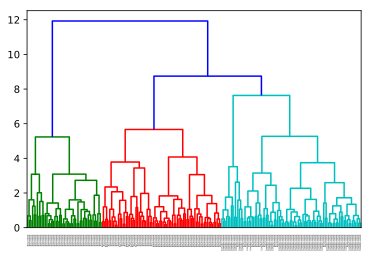

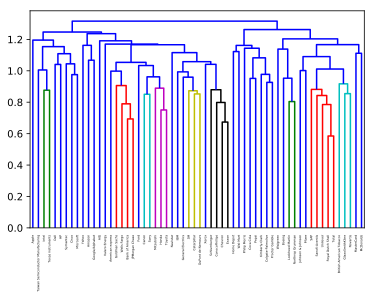

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings_grain = linkage(df_grain_sans, method='complete')

dendrogram(mergings_grain, labels=varieties, leaf_rotation=90, leaf_font_size=2)

plt.show()

# stocks_normed = Normalizer(stocks) this does not work because Normalizer() 
# makes Normalizer object, not pure

from sklearn.preprocessing import normalize

stocks_normed = normalize(stocks)

mergings_stocks = linkage(stocks_normed, method='complete')

dendrogram(mergings_stocks, labels=companies, leaf_rotation=90, leaf_font_size=3)

plt.show();

# Beyond visual, HierClustering is powerful! - cluster labels at any intermediate stage can be recovered, then be used in further analysis !
## e.g. Cross-tabulation (KMeans)
## Stages are specified choosing 'height' on dendrogram
## What is meaning of 'height' or cut-off >> the y-axis of dendrogram encodes **distance between merging clusters**
## donc, should stop merging further at such 'height'/'distance'
## 'method=complete' means distance between clusters is max.distance between their samples >> 'single' linkage takes distance between CLOSEST points of clusters
#### extracting cluster lables intermediary
``` fcluster ``` method > NumPy array of cluster labels

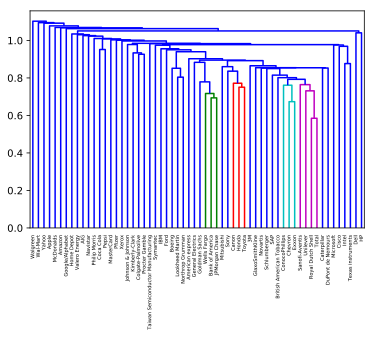

In [30]:
# using 'single' method in linkage

mergings_single = linkage(stocks_normed, method='single')
dendrogram(mergings, labels=companies, leaf_font_size=5,leaf_rotation=90)
plt.show();

In [32]:
# cross-tabulation of cut-off clusters

from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings_grain, 6, criterion='distance')

df_fcluster = pd.DataFrame({
    'labels': labels,
    'varieties':varieties
})

ct_fcluster = pd.crosstab(df_fcluster['labels'], df_fcluster['varieties'])

print(ct_fcluster)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


# t-SNE (2D) : 't-distributed stochastic neighour embedding'
## Maps samples to 2D space (or 3D)
## Approxi preserves neatness of samples
- iris has 4 measurements, hence 4D
- t-SNE amps samples to 2D space
- t-SNE didn't know that there were different species
- ...yet kept the species mostly separate
## New insight gained, such that some species are closer, consistent with k-means inertia plot: could argue for 2 clusters or 3
```
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
yx = transformed[:,1]
plt.scatter(xs, ys, c=species)
```
### only fit_transform(), hence cannot extend the map to include new data samples, must start anew each time
### Wrong choice bunch together
### t-SNE features are varied each time

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 15)

(178, 13)

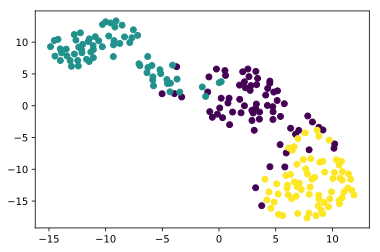

In [54]:
df_wine = pd.read_csv('Data_Folder/wine.csv')
df_wine.head()
df_wine.shape

wine = np.array(df_wine.iloc[:, 2:])
wine.shape
variety_numbers = df_wine.iloc[:,0].tolist()

# init model

from sklearn.manifold import TSNE

# convert varieties cat into numeric for TSNE model

varieties = pd.factorize(varieties)[0]+1


model_tsne = TSNE(learning_rate=200)

tsne_features = model_tsne.fit_transform(df_grain_sans)

xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=varieties)
plt.show()

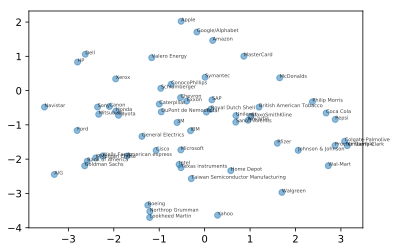

In [56]:
# visualising high-dimensional data such as these that makes t_SNE powerful tool

model_stocks_tsne = TSNE(learning_rate=50)

tsne_features_stock = model_stocks_tsne.fit_transform(stocks_normed)

xs = tsne_features_stock[:,0]
ys = tsne_features_stock[:,1]

plt.scatter(xs, ys, alpha=0.5)

# annotate

for x, y, comp in zip(xs, ys, companies):
    plt.annotate(comp, (x,y), fontsize=5, alpha=0.75)
plt.show();

# PCA transformation - DIMENSION REDUCTION
- efficient storage and computation
- remove less-informative 'noise' features
- ...which cause problems for prediction tasks, e.g. classification and regression
# PCA = 'Principal Component Analysis' - fundamental dimension reduction technique
## First step 'decorrelation'
## Second step reduces dimension
### PCA a scikit-learn component like KMeans or StandardScaler
### fit() learns the transformation from given data
### transform() applies leraned transformation AND able to apply new data
#### resulting data has same ROW but new PCA FEATURES columns
## many features from datasets are often correlated, PCA transformed features are 'DE-correlated', not linearly correlated
# So named because it learns the PRINCIPAL COMPONENTS of data => DIRECTIONS OF VARIANCE

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


(10.050643369175624, 21.71935663082437, 12.152823399558498, 17.5071766004415)

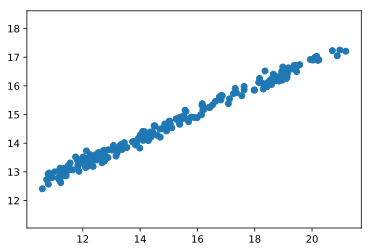

0.9943409310122265

(-5.597290413683027, 7.290476183961193, -3.4488882960338145, 4.763472738997324)

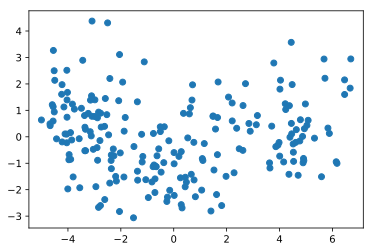

-1.4182800767909673e-17

In [62]:
df_grain_sans.head()
width=df_grain_sans.iloc[:,0]
length=df_grain_sans.iloc[:,1]

from scipy.stats import pearsonr

plt.scatter(width, length)
plt.axis('equal')
plt.show()

corr, pval = pearsonr(width, length)
corr

# decomposition using PCA

from sklearn.decomposition import PCA

model_PCA = PCA()

pca_features = model_PCA.fit_transform(df_grain_sans)

xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

corr, pval = pearsonr(xs, ys)
corr

# Intrinsic dimension !! - e.g. long&lad 2D of flight path can be reduced to 1D displacement along flight path
# Number of feature required to APPROX it
## Essential idea behind dimension reduction, what's the most compact representation of samples - PCA detection
- e.g. iris dataset,
- each samples is rep by 3 colors in 3D, 
- but visually they align to a 'flat' plane -> 2D
- scatter plot work only if 2 or 3 features, to visualise
- PCA identifies instrinsic dimension when samples have any number of features !
- Intrinsic dimension = num of PCA features with significant variance
# essentially discarding LOW VARIANCE PCA features - left with instrinsic dimensions
## However, this concept is a guide with ambiguity, the 'significance' threshold in variance is up to decision

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(10.050643369175624, 21.71935663082437, 12.152823399558498, 17.5071766004415)

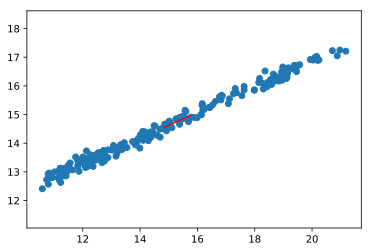

In [64]:
# visual direction of variance

plt.scatter(width, length)

model = PCA()

model.fit(df_grain_sans)

mean = model.mean_

first_pc = model.components_[0,:]

plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1],
         color='red', width=0.01)

plt.axis('equal') # keep axes on same scale
plt.show()

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

<BarContainer object of 6 artists>

Text(0.5,0,'PCA Features')

Text(0,0.5,'Variance')

([<matplotlib.axis.XTick at 0x1a1b6d65f8>,
 <a list of 6 Text xticklabel objects>)

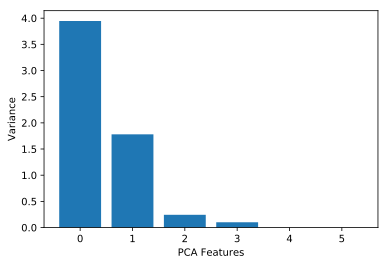

In [67]:
# the fish dataset is 6D, what is its INSTRINSIC DIMENSIONS? 

pca = PCA()

pipeline_pca = make_pipeline(scaler, pca)

pipeline_pca.fit(array_fish)

features_pca = range(pca.n_components_)

plt.bar(features_pca, pca.explained_variance_)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.xticks(features_pca)
plt.show()

# PCA(n_components=) best specify how many PCA features to keep
## A good choice = intrinsic dimension, if known
# underlying ASSUMPTION = variance = significance
## This holds often in practice BUT word countign is a good exception
## many features (words) holds a near empty column due to rarity in most tests, this is SPARSE MATRIX, 
```
scipy.sparse.csr_matrix
```
## is used instead of NumPy array for efficiency
## BUT PCA incompatible with sparse matrix - SOLUTION: 
```
TruncatedSVD()
```
```
model = TruncatedSVD(n_components=3)
```
## Rest is the same as PCA

In [71]:
# from previous fish n_component_ attribute distribution we keep 2 instrinc dimension

pca_fish = PCA(n_components=2)
pca_fish.fit(array_fish)
pca_fish_features = pca_fish.transform(array_fish)

pca_fish_features.shape

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(85, 2)

In [72]:
# tf-idf word frequency array for documents

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


# Clustering Wikipedia 
## TruncatedSVD() is able to perform PCA on SPARSE ARRAYS in csr_matrix() format, such as word-frequency arrays, containing many Zero entries due to rarity
## Combine savoir of TruncatedSVD and K-Means to cluster some popular pages from wikipedia
## Building a pipeline

To preprocess `wikipedia-vectors.csv` into the format in which you used it in the exercises, you have to take its transpose:

```{python}
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)
```

The reason for taking this transpose is that without it, there would be 13,000 ROWs (corresponding to the 13,000 words in the file), which is a lot of ROWs for a CSV to have.

In [73]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [84]:
df_wiki = pd.read_csv('Data_Folder/Wikipedia articles/wikipedia-vectors.csv',
                     index_col=0)
df_wiki.head()
df_wiki.shape


from scipy.sparse import csr_matrix

articles = csr_matrix(df_wiki.transpose())
articles
titles = list(df_wiki.columns)
titles

type(articles)


pipeline.fit(articles)
labels = pipeline.predict(articles)

df = pd.DataFrame({'label':labels, 'articles':titles})

print(df.sort_values('label'))

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


(13125, 60)

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Predniso

scipy.sparse.csr.csr_matrix

Pipeline(memory=None,
     steps=[('truncatedsvd', TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

    label                                       articles
19      0  2007 United Nations Climate Change Conference
17      0  Greenhouse gas emissions by the United States
16      0                                        350.org
15      0                                 Kyoto Protocol
14      0                                 Climate change
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
10      0                                 Global warming
18      0  2010 United Nations Climate Change Conference
29      1                               Jennifer Aniston
22      1                              Denzel Washington
23      1                           Catherine Zeta-Jones
24      1                                   Jessica Biel
25      1                                  Russell Crowe
26      1                                     Mila Kunis
27      1                      

# NMF - 'non-negative matrix factorisation'
## like PCA is a DR, BUT interpretable, for explaining, requires non-zero data
## e.g. NMF expresses documents as combinations of topics (or 'themes') and images as combo of patterns
## follows fit/transform, BUT must specify n_components, works ith CRS_MATRIX !
# Word-frequency array 
- e.g. 4 words against many documents
- measure presence of words in each document using 'tf-idf'
## tf = frequency of words in document
## idf = reduces influence of frequent words 'like the'
## Able to Reconstruction of sample 
- by multiple compoents by feature values, and add up, or product matrices, Matrix factorisation' origin
- **e.g. NMF feature is [2, 1], components of NMF model = [1, 0.5, 0],[0.2, 0.1, 2.1], then multiply both and sum col-wise**
- images encoded as arrays, audio spectrograms, purchase histoires on e-commerce sites, etc


In [88]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model_nmf = NMF(n_components=6)

# Fit the model to articles
model_nmf.fit(articles)

# Transform the articles: nmf_features
nmf_features = model_nmf.transform(articles)

# Print the NMF features
print(nmf_features[:5,:])

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=6, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

[[0.         0.         0.         0.         0.         0.44046533]
 [0.         0.         0.         0.         0.         0.56660469]
 [0.00382044 0.         0.         0.         0.         0.39864675]
 [0.         0.         0.         0.         0.         0.3817399 ]
 [0.         0.         0.         0.         0.         0.48551662]]


In [90]:
df_nmf = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df_nmf.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df_nmf.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575656
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422340
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


# Notice both actors NMF feature 3 has highest value, meaning that both articles are reconstructed using mainly the 3rd NMF component. why? (hint: NMF components represent 'theme', ie. acting)
# Example of NMF learns interpretable parts
- e.g. word-frequency array artiles (tf-idf) (ie. sparse matrix)
- 20,000 scientific articles (rows)
- 800 words (cols) (i.e. previous wiki titles)
- after fitting/learning, nmf.components_ for each row yields a pattern (top words or sort value reveals a pattern)
## For doc: NMF components represent topics, NMF features combine topics into doc
## For images, NMF components are parts of images
### e.g. 'grayscale' image represents b/w img scaling 0 to 1 on brightness
### this 2D array **(n x m can be as detailed as pixels)** tehn be **flattened** into **(1 x n+m)** array, which combining with many img form a 2D **(i x n+m)** array, similar to Document case above
- in other words, a collection of images of the same array size encoded as 2D array each row = image each col = pixel
- NMF can then be applied !!

In [122]:
# try NMF component array on actors

words = pd.read_csv('Data_Folder/Wikipedia articles/wikipedia-vocabulary-utf8.txt',
                    delimiter='\n', header=None)

words = words.iloc[:,0].tolist()

components_df = pd.DataFrame(model_nmf.components_, columns=words)

print(components_df.shape)

component = components_df.loc[3]

print(component.nlargest())

(6, 13125)
film       0.627936
award      0.253156
starred    0.245308
role       0.211471
actress    0.186415
Name: 3, dtype: float64


,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


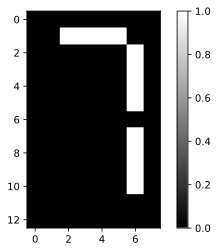

In [126]:
df_led = pd.read_csv('Data_Folder/lcd-digits.csv', header=None)
df_led.head()

df_led = np.array(df_led)

digit = df_led[0,:]

print(digit)

# reconstructing img from 1xn array

bitmap = digit.reshape(13,8)

plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


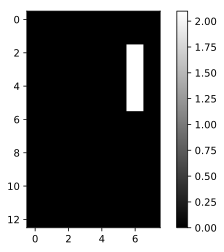

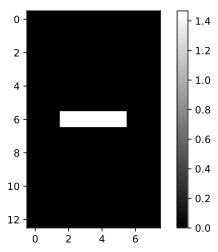

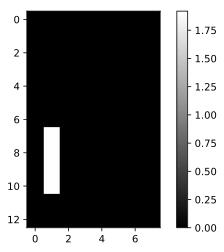

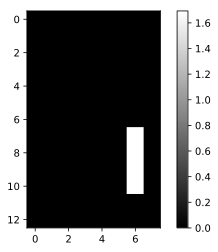

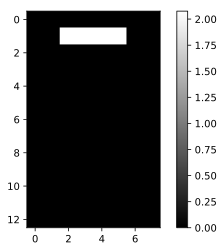

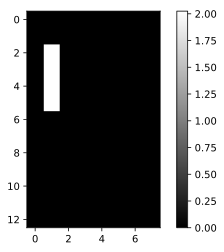

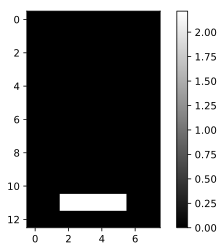

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [130]:
# def func to displays image encoded by any 1D array

def show_1D_image(sample):
    bitmap = sample.reshape((13,8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# n_component = 7 because there are 7 cells in the led digit form

# Create an NMF model: model
model_led = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model_led.fit_transform(df_led)

# Call show_as_image on each component
for component in model_led.components_:
    show_1D_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

# Note how NMF expresses the digit as a sum of its components !

# PCA doesn't learn parts
## Unlike NMF, PCA doesn't learn parts of things, its components do not correspond to topics or images.

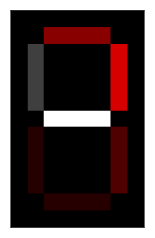

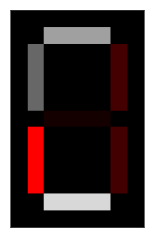

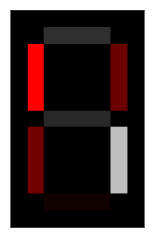

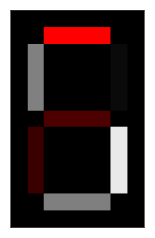

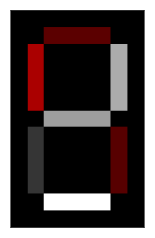

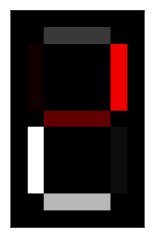

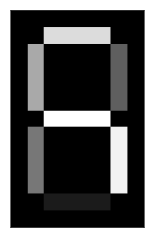

In [131]:
# Create a PCA instance: model
model_led_pca = PCA(n_components=7)

# Apply fit_transform to samples: features
features_led_pca = model_led_pca.fit_transform(df_led)

# modified show_as_image colors a pixel red if negative value
def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Call show_as_image on each component
for component in model_led_pca.components_:
    show_as_image(component)

# Building RECOMMANDER system using NMF
## Suppose a large online newspaper aiming to recommand articles similar to those being read by a customer
## Similar articles should have simialr topics, using NMF is a good way to start
## Strategy:
- apply NMF to word-frequency array
- NMF feature values describe the topics
- ...so similar doc have similar NMF feature values
- BUT how to weigh various feature vaules??
## Different verions of the same doc have same topic PROPORTIONS
- ...exact feature values may differ !!
- e.g. meaningful vocab vs trite
- BUT all versions lie on the SAME LINE through the origin
## COSINE similarlity !
- uses the angle between the lines
- higher vlaues means more similar
- max value = 1, when angle = 0 degree

In [132]:
# finding similar wiki-articles as 'Cristina Renaldo'

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


# Case: recommanding artist
- row: artisits
- column: users
- cell: num of times each artist listened to by each user
## Preprocessing: MaxAbsScaler so that all users have the same influence on the model, regardless of how mnay different artists they've listened to (some people just listen more
## method: normalised NMF features for recommandation !

In [140]:
"""

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())
"""

"\n\n# Create a MaxAbsScaler: scaler\nscaler = MaxAbsScaler()\n\n# Create an NMF model: nmf\nnmf = NMF(n_components=20)\n\n# Create a Normalizer: normalizer\nnormalizer = Normalizer()\n\n# Create a pipeline: pipeline\npipeline = make_pipeline(scaler,nmf,normalizer)\n\n# Apply fit_transform to artists: norm_features\nnorm_features = pipeline.fit_transform(artists)\n\n# Create a DataFrame: df\ndf = pd.DataFrame(norm_features, index=artist_names)\n\n# Select row of 'Bruce Springsteen': artist\nartist = df.loc['Bruce Springsteen']\n\n# Compute cosine similarities: similarities\nsimilarities = df.dot(artist)\n\n# Display those with highest cosine similarity\nprint(similarities.nlargest())\n"